In [ ]:
# Problem Statement - predict how likely individuals are to receive their H1N1 and seasonal flu vaccines.

In [4]:
# Importing Necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import io
%cd "\\MADHAB\Users\ADMIN\Desktop\PYTHON\H1N1_FLU@DRIVENDATA"

\\MADHAB\Users\ADMIN\Desktop\PYTHON\H1N1_FLU@DRIVENDATA


In [6]:
vaccinetrain=pd.read_csv("training_set_features.csv")

In [7]:
vaccinetest=pd.read_csv("test_set_features.csv")

In [8]:
labels=pd.read_csv("training_set_labels.csv")

In [9]:
print(vaccinetrain.shape)
print(vaccinetest.shape)
print(labels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [10]:
vaccinetrain["id"]="train"
vaccinetest["id"]="test"

In [11]:
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

# Checking Null Values

In [12]:
combinedf.isnull().sum().sort_values(ascending=False)

employment_occupation          26896
employment_industry            26605
health_insurance               24502
income_poverty                  8920
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
rent_or_own                     4078
employment_status               2934
marital_status                  2850
education                       2814
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
opinion_seas_sick_from_vacc     1058
opinion_seas_risk               1013
opinion_seas_vacc_effective      914
opinion_h1n1_vacc_effective      789
opinion_h1n1_sick_from_vacc      770
opinion_h1n1_risk                768
household_children               474
household_adults                 474
behavioral_avoidance             421
behavioral_touch_face            256
h1n1_knowledge                   238
h1n1_concern                     177
behavioral_outside_home          164
behavioral_large_gatherings      159
b

In [13]:
# VALUE_COUNTS OF DIFFERENT FEATURES
for col in combinedf.drop(["respondent_id","id"],axis=1).columns:
    freq=combinedf[col].value_counts(dropna=False)
    print(freq)
    print('*'*70)

2.0    21318
1.0    16311
3.0     9114
0.0     6495
NaN      177
Name: h1n1_concern, dtype: int64
**********************************************************************
1.0    29227
2.0    19002
0.0     4948
NaN      238
Name: h1n1_knowledge, dtype: int64
**********************************************************************
0.0    50642
1.0     2623
NaN      150
Name: behavioral_antiviral_meds, dtype: int64
**********************************************************************
1.0    38564
0.0    14430
NaN      421
Name: behavioral_avoidance, dtype: int64
**********************************************************************
0.0    49687
1.0     3690
NaN       38
Name: behavioral_face_mask, dtype: int64
**********************************************************************
1.0    44045
0.0     9288
NaN       82
Name: behavioral_wash_hands, dtype: int64
**********************************************************************
0.0    34346
1.0    18910
NaN      159
Name: behavioral_large_g

In [14]:
# Here 50% of data is missing so we decided to use KNNImputer
# K Nearest Neighbors is a non-parametric algorithm that uses distance
# calculation like Euclidean to calculate distance btn missing value 
# And closet 5 Neighbors( that means 5 rows ) and smallest distance is imputed .

# For running this imputer on object or categorical data , labelencoding must be done before running imputer. 


# Lable Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder() 

In [17]:
stringcols=combinedf.drop(["respondent_id","id"],axis=1)

In [18]:
stringcols=stringcols.astype(str).apply(lambda series:pd.Series(
le.fit_transform(series[series.notnull()]),index=series[series.notnull()].index))  ## lamda is anonymous function(there is no name)
# Here when we use a function in backhand it will take it as a numpy array or series but in OOB(i.e object oriented progamming)
# for the safe side we are here mentioning the lamda series:pd.Series.

# Missing Value Imputation by KNNImputer

In [19]:
from sklearn.impute import KNNImputer

In [20]:
imputer=KNNImputer()

In [21]:
stringcolsimp=imputer.fit_transform(stringcols)

In [22]:
stringcols.isnull().sum().sort_values(ascending=False)

h1n1_concern                   0
marital_status                 0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
rent_or_own                    0
opinion_seas_vacc_effective    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_industry            0
opinion_seas_risk              0
opinion_h1n1_sick_from_vacc    0
h1n1_knowledge                 0
behavioral_touch_face          0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
doctor_recc_h1n1               0
opinion_h1n1_risk              0
doctor_recc_seasonal           0
chronic_med_condition          0
child_unde

In [23]:
stringcolsimp=pd.DataFrame(stringcolsimp,columns=stringcols.columns)

In [66]:
for col in stringcolsimp.columns:
    freq=stringcolsimp[col].value_counts(dropna=False)
    print(freq)
    print('*'*70)

2.0    21318
1.0    16311
3.0     9114
0.0     6495
4.0      177
Name: h1n1_concern, dtype: int64
**********************************************************************
1.0    29227
2.0    19002
0.0     4948
3.0      238
Name: h1n1_knowledge, dtype: int64
**********************************************************************
0.0    50642
1.0     2623
2.0      150
Name: behavioral_antiviral_meds, dtype: int64
**********************************************************************
1.0    38564
0.0    14430
2.0      421
Name: behavioral_avoidance, dtype: int64
**********************************************************************
0.0    49687
1.0     3690
2.0       38
Name: behavioral_face_mask, dtype: int64
**********************************************************************
1.0    44045
0.0     9288
2.0       82
Name: behavioral_wash_hands, dtype: int64
**********************************************************************
0.0    34346
1.0    18910
2.0      159
Name: behavioral_large_g

In [25]:
vaccinetraindf=stringcolsimp.loc[0:26706]


In [26]:
vaccinetestdf=stringcolsimp.loc[26707:53415]

In [27]:
print(vaccinetraindf.shape)
print(vaccinetestdf.shape)

(26707, 35)
(26708, 35)


In [28]:
y=labels.seasonal_vaccine
X=vaccinetraindf

# EDA

<AxesSubplot:ylabel='seasonal_vaccine'>

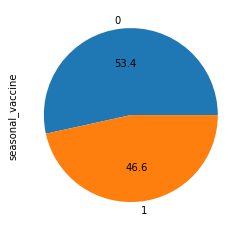

In [29]:
#Create a pie chart of dependent variables ? balanced or imbalanced
pd.value_counts(y).plot(kind="pie",autopct="%0.1f")
# Analysis = here from this pie chart it is clearly visible that 53.4% (0=NO) of total population didn't get the seasonal_vaccine.

<AxesSubplot:ylabel='h1n1_vaccine'>

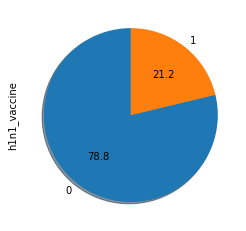

In [67]:
pd.value_counts(y1).plot(kind="pie",autopct="%0.1f",shadow=True,startangle=90)
#  Analysis = here from this pie chart it is clearly visible that 78.8% (0=NO) of total population didn't get the h1n1_vaccine.

<AxesSubplot:xlabel='h1n1_concern'>

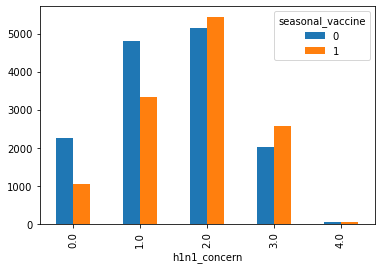

In [31]:
# Create a stacked bar plot of h1n1concern & seasonal_vaccine
# 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
pd.crosstab(X.h1n1_concern,y).plot(kind="bar",stacked=False)
# Analysis= from this bar plot the category 2 i.e somewhat concerned(YES=1) about the seasonal vaccine is the highest.

<AxesSubplot:xlabel='h1n1_concern'>

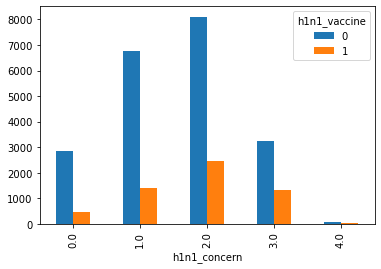

In [68]:
# Create a stacked bar plot of h1n1concern & h1n1_vaccine
# 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
pd.crosstab(X.h1n1_concern,y1).plot(kind="bar",stacked=False)
# Analysis= from this bar plot the category 2 i.e somewhat concerned(NO=0) about the h1n1_vaccine is the highest.

<AxesSubplot:xlabel='h1n1_knowledge'>

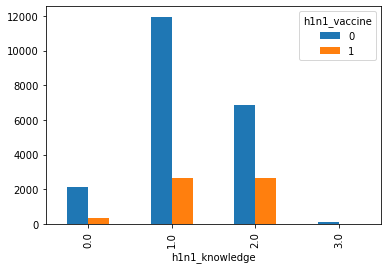

In [46]:
# Create a stacked bar plot of h1n1knowledge & h1n1_vaccine
pd.crosstab(X.h1n1_knowledge,y1).plot(kind="bar",stacked=False)

<AxesSubplot:xlabel='h1n1_knowledge'>

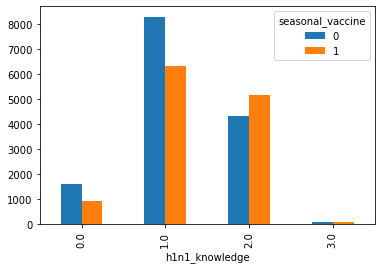

In [47]:
# Create a stacked bar plot of h1n1knowledge & seasonal_vaccine
pd.crosstab(X.h1n1_knowledge,y).plot(kind="bar",stacked=False)

<AxesSubplot:xlabel='doctor_recc_h1n1'>

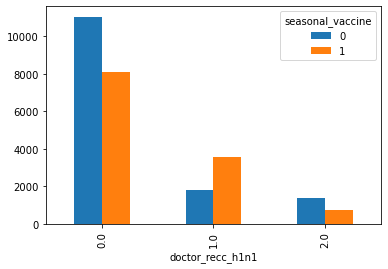

In [48]:
# Create a stacked bar plot of doctor_recc_h1n1 & seasonal_vaccine
pd.crosstab(X.doctor_recc_h1n1,y).plot(kind="bar",stacked=False)

<AxesSubplot:xlabel='doctor_recc_h1n1'>

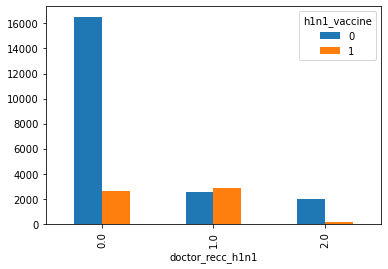

In [49]:
# Create a stacked bar plot of doctor_recc_h1n1 & h1n1_vaccine
pd.crosstab(X.doctor_recc_h1n1,y1).plot(kind="bar",stacked=False)

<AxesSubplot:xlabel='doctor_recc_seasonal'>

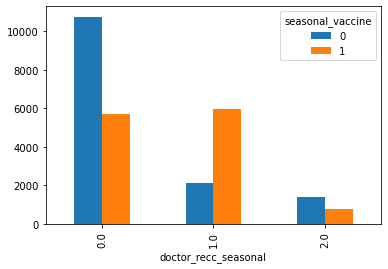

In [50]:
# Create a stacked bar plot of doctor_recc_seasonal & seasonal_vaccine
pd.crosstab(X.doctor_recc_seasonal,y).plot(kind="bar",stacked=False)

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logit=LogisticRegression(max_iter=3000)

In [37]:
logitmodel=logit.fit(X,y)

In [38]:
logitmodel.score(X,y) # accuracy=0.76

0.7610738757629086

In [39]:
logitpredict=logitmodel.predict(X)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     14272
           1       0.75      0.73      0.74     12435

    accuracy                           0.76     26707
   macro avg       0.76      0.76      0.76     26707
weighted avg       0.76      0.76      0.76     26707



In [42]:
from sklearn.metrics import plot_roc_curve

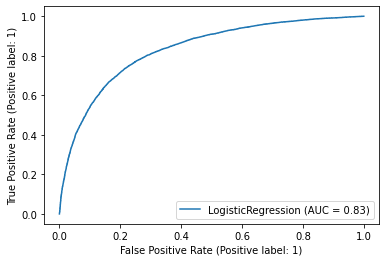

In [43]:
plot_roc_curve(logit,X,y) #AUC=0.67

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
cross_val_score(logit,X,y).mean()

0.7601379479932827

# Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB # independent features are continious then use this

In [47]:
naive=GaussianNB()

In [197]:
naivemodel=naive.fit(X,y)

In [198]:
naivemodel.score(X,y)   # Accuracy=0.71

0.7113116411427716

In [199]:
naivepredict=naivemodel.predict(X)

In [200]:
print(classification_report(y,naivepredict))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     14272
           1       0.68      0.73      0.70     12435

    accuracy                           0.71     26707
   macro avg       0.71      0.71      0.71     26707
weighted avg       0.71      0.71      0.71     26707



In [201]:
cross_val_score(naive,X,y).mean()

0.7106753552251603

In [202]:
from sklearn.naive_bayes import CategoricalNB # independent features are discrete then use this

In [203]:
catnb=CategoricalNB()

In [204]:
catnbmodel=catnb.fit(X,y)

In [205]:
catnbmodel.score(X,y)

0.7545961732879021

In [206]:
catnbpredict=catnbmodel.predict(X)

In [207]:
print(classification_report(y,catnbpredict))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     14272
           1       0.73      0.74      0.74     12435

    accuracy                           0.75     26707
   macro avg       0.75      0.75      0.75     26707
weighted avg       0.75      0.75      0.75     26707



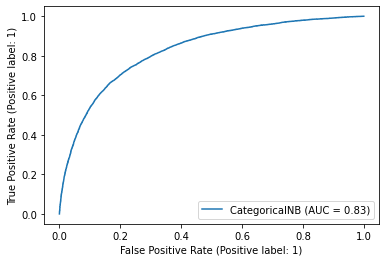

In [208]:
plot_roc_curve(catnb,X,y) #AUC=0.77

In [209]:
cross_val_score(catnb,X,y).mean()

0.7531359485976648

# Both H1N1 & Seasonal Vaccine

In [48]:
y1=labels.h1n1_vaccine

In [49]:
logitmodel2=logit.fit(X,y1)

In [50]:
logitmodel2.score(X,y1)

0.8279851724267047

In [51]:
logitseasonpredict=logitmodel.predict(vaccinetestdf)

In [52]:
logith1n1predict=logitmodel2.predict(vaccinetestdf)

In [53]:
pd.DataFrame(logitseasonpredict).to_csv("logitseason.csv")

In [216]:
pd.DataFrame(logith1n1predict).to_csv("logith1n1.csv")

In [217]:
catnbmodel2=catnb.fit(X,y1)

In [218]:
catnbmodel2.score(X,y1)

0.8092260456060208

In [219]:
catnbseasonpredict=catnbmodel.predict(vaccinetestdf)

In [220]:
catnbh1n1predict=catnbmodel2.predict(vaccinetestdf)

In [221]:
pd.DataFrame(catnbseasonpredict).to_csv("catnbseason.csv")

In [222]:
pd.DataFrame(catnbh1n1predict).to_csv("catnbh1n1.csv")

# Decision Tree

In [223]:
from sklearn.tree import DecisionTreeClassifier

In [224]:
tree=DecisionTreeClassifier(max_depth=12)

In [225]:
treemodel=tree.fit(X,y)

In [226]:
treemodel.score(X,y) #Accuracy=0.86

0.8607481184708129

In [227]:
treepredict=treemodel.predict(X)

In [228]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14272
           1       0.86      0.84      0.85     12435

    accuracy                           0.86     26707
   macro avg       0.86      0.86      0.86     26707
weighted avg       0.86      0.86      0.86     26707



In [229]:
from sklearn.metrics import plot_roc_curve

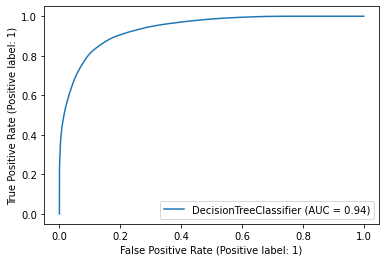

In [230]:
plot_roc_curve(tree,X,y) # AUC=0.94

In [231]:
cross_val_score(tree,X,y).mean() # Cross Validation =0.73

0.73355326241179

In [232]:
treemodel2=tree.fit(X,y1)

In [233]:
treemodel2.score(X,y1) # Accuracy=0.90

0.9083760811772195

In [234]:
treeseasonpredict=treemodel.predict(vaccinetestdf)

In [235]:
treeh1n1predict=treemodel.predict(vaccinetestdf)

In [236]:
pd.DataFrame(treeseasonpredict).to_csv("treeseason.csv")

In [237]:
pd.DataFrame(treeh1n1predict).to_csv("treeh1n1.csv")

# Random Forest

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
rf=RandomForestClassifier(max_depth= 10,n_estimators=600)

In [241]:
rfmodel=rf.fit(X,y)

In [242]:
rfmodel.score(X,y) # Accuracy=0.82

0.8273111918223687

In [243]:
RFpredict=rfmodel.predict(X)

In [244]:
pd.crosstab(y,RFpredict)

col_0,0,1
seasonal_vaccine,,
0,12268,2004
1,2608,9827


In [245]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     14272
           1       0.83      0.79      0.81     12435

    accuracy                           0.83     26707
   macro avg       0.83      0.82      0.83     26707
weighted avg       0.83      0.83      0.83     26707



In [247]:
#cross_val_score(rf,X,y,cv=5).mean()

In [248]:
rfmodel2=rf.fit(X,y1)

In [249]:
rfmodel2.score(X,y1)

0.8760624555360018

In [250]:
rfseasonpredict=rfmodel.predict(vaccinetestdf)

In [251]:
rfh1n1predict=rfmodel.predict(vaccinetestdf)

In [252]:
pd.DataFrame(rfseasonpredict).to_csv("rfseason.csv")

In [253]:
pd.DataFrame(rfh1n1predict).to_csv("rfh1n1.csv")

# Gradient Boosting

In [255]:
from sklearn.ensemble import GradientBoostingClassifier

In [256]:
gbm=GradientBoostingClassifier(n_estimators=4000)

In [257]:
gbmmodel=gbm.fit(X,y)

In [258]:
gbmmodel.score(X,y) #Accuracy=0.85

0.8566667914778897

In [259]:
gbmpredict=gbmmodel.predict(X)

In [260]:
pd.crosstab(y,gbmpredict)

col_0,0,1
seasonal_vaccine,,
0,12460,1812
1,2016,10419


In [261]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     14272
           1       0.85      0.84      0.84     12435

    accuracy                           0.86     26707
   macro avg       0.86      0.86      0.86     26707
weighted avg       0.86      0.86      0.86     26707



In [262]:
#cross_val_score(gbm,X,y,cv=5).mean()

In [263]:
gbmmodel2=gbm.fit(X,y1)

In [264]:
gbmmodel2.score(X,y1)

0.9108473433931179

In [265]:
gbmseasonpredict=gbmmodel.predict(vaccinetestdf)

In [266]:
gbmh1n1predict=gbmmodel.predict(vaccinetestdf)

In [267]:
pd.DataFrame(gbmseasonpredict).to_csv("gbmseason.csv")

In [268]:
pd.DataFrame(gbmh1n1predict).to_csv("gbmh1n1.csv")

# SVM

In [54]:
from sklearn.svm import SVC

In [55]:
svc=SVC()

In [56]:
svcmodel=svc.fit(X,y)

In [58]:
svcmodel.score(X,y) # Accuracy=0.77

0.7783352679072902

In [59]:
svcpredict=svc.predict(X)

In [275]:
svcpredict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [276]:
pd.crosstab(y,svcpredict)

col_0,0,1
seasonal_vaccine,,
0,11580,2692
1,3228,9207


In [277]:
print(classification_report(y,svcpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     14272
           1       0.77      0.74      0.76     12435

    accuracy                           0.78     26707
   macro avg       0.78      0.78      0.78     26707
weighted avg       0.78      0.78      0.78     26707



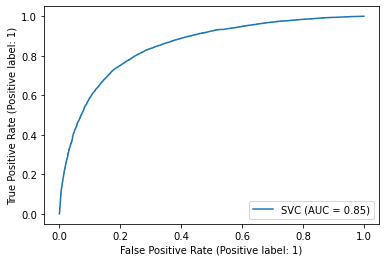

In [60]:
plot_roc_curve(svc,X,y)

In [278]:
#cross_val_score(svc,X,y,cv=5).mean()

In [61]:
svcmodel2=svc.fit(X,y1)

In [62]:
svcmodel2.score(X,y1)

0.8273860785561837

In [63]:
svcseasonpredict=svcmodel.predict(vaccinetestdf)

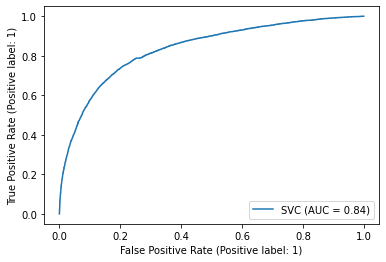

In [65]:
plot_roc_curve(svcmodel2,X,y1)